In [22]:
% matplotlib inline
from matplotlib import pyplot as plt
from drift_qec.twoangledephasing import *
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

# Drift rates vs granularity
Two grid cells are equivalent, and therefore should be joined (i.e.: the granularity should be decreased), if their probabilities are similar. For the normal distribution, this should be calculated for the grid cells that neighbour the greatest increase/decrease in the pdf. Inflection points on a normal curve are at $\pm \sigma$. At an inflection point, the absolute value of the first derivative is

$$1 / (\sigma^2 \sqrt{2 \pi e})$$

Thus, if we want the probability $p$ to remain within $\epsilon$ of the original value, we must have grids that are not more than $\epsilon \sigma^2 \sqrt{2 \pi e}$ apart. In other words, the number of grid points scales as $1/\sigma^2$. But $\sigma^2$ itself only scales as $\kappa^2 N$. So we have to use $\kappa^2$.

In [13]:
estimator = SurfboardEstimator()
channel = SurfboardChannel()

idxval, idxhat, errors = [], [], []

for t in range(100):
    s = channel.get_error()
    estimator.update(s)
    channel.update(estimator.Qhat)
    idxval.append(channel.idx)
    idxhat.append(estimator.idx)
    errors.append(s)

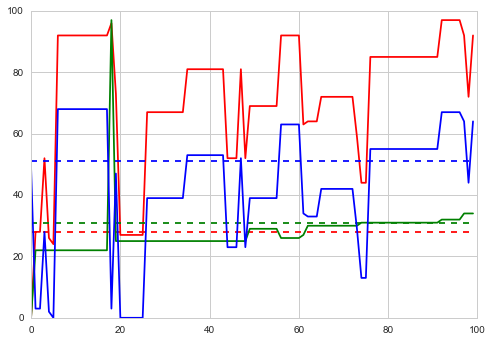

In [14]:
val = np.array(idxhat)
hat = np.array(idxval)
colors = ["red", "green", "blue"]
for k, color in enumerate(colors):
    plt.plot(val[:, k], color=color)
    plt.plot(hat[:, k], color=color, ls="--")